<a href="https://colab.research.google.com/github/KaterineMoon/AlgorithmsUN2020II/blob/master/21BlackjackGrAlgorithms1StGroup1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://portafoliodigitalmodelosojcr.weebly.com/uploads/4/8/8/4/48840943/1824297_orig.jpg" align="center"/>

In [ ]:
import random as r
import matplotlib.pyplot as plt
import matplotlib.ticker as plt_tick
import numpy as np

## Definición del método Monte Carlo para blackjack

In [ ]:
def monte_carlo_blackjack(iterations, deck, initial_game_cards=[], saving_memory=False, ploting=False):
  win_count = 0
  win_game_cards_count = []
  for _ in range(iterations):
    game_cards = initial_game_cards[:]
    game_deck = deck[:]
    while sum(game_cards) < 21:
      card = r.choice(game_deck)
      game_deck.remove(card)
      game_cards.append(card)
    if sum(game_cards) == 21:
      win_count += 1
      if not saving_memory:
        win_game_cards_count.append(len(game_cards))
  #print('Gané {} veces y perdí {} veces, la probabilidad de ganar es de {}'.format(win_count, iterations-win_count, win_count/iterations))
  if not saving_memory:
    if ploting:
      win_game_cards_unique = list(set(win_game_cards_count))
      win_game_cards_weight = []
      win_game_cards_percentage = []
      win_game_cards_distribution = []
      for n in win_game_cards_unique:
        n_count = win_game_cards_count.count(n)
        win_game_cards_weight.append(n_count)
        win_game_cards_percentage.append('{:.2f}%'.format(n_count*100/len(win_game_cards_count)))
        win_game_cards_distribution.append(float('{:.2f}'.format(n_count/len(win_game_cards_count))))
      chart = plt.bar(win_game_cards_unique, win_game_cards_distribution, alpha=0.5)
      table = plt.table(cellText=[win_game_cards_percentage, win_game_cards_weight],
                        rowLabels=['Porcentaje', 'Cantidad'],
                        colLabels=win_game_cards_unique,
                        loc='bottom')
      plt.subplots_adjust(left=0.2, bottom=0.2)
      plt.xticks([])
      plt.show();

      plt.show();
  else:
      #pass
      print(game_cards)
  #print("veces ganadas {}".format(win_count))
  #print("repeticiones {}".format(iterations))
  #print("Probabilidad de ganar {}".format(win_count/iterations))
  return win_count/iterations, win_game_cards_count

## Punto 1

In [ ]:
# standard decks
std_spanish_deck = [1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12] 
std_poker_deck = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

In [ ]:
probability, win_cards_sum = monte_carlo_blackjack(1000000, std_spanish_deck, saving_memory=True)
print("Probabilidad de ganar {}".format(probability))

[6, 12, 1, 12]
Probabilidad de ganar 0.158521


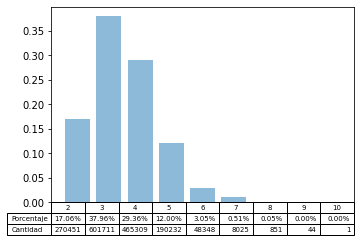

Probabilidad de ganar 0.1584972


In [ ]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, std_spanish_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))

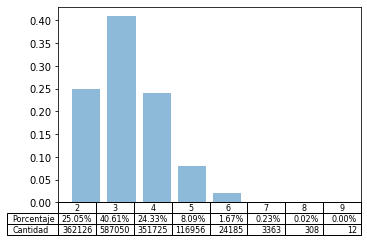

Probabilidad de ganar 0.1445725


In [ ]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, std_poker_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))

## Punto 2

In [ ]:
# normal weight decks
nrm_spanish_deck = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]
nrm_poker_deck = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

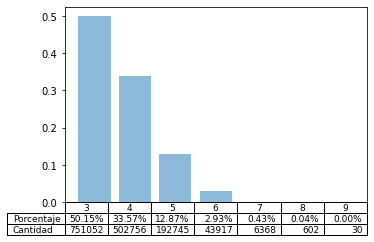

Probabilidad de ganar 0.149747


In [ ]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, nrm_spanish_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))

In [ ]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, nrm_poker_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))

## Punto 3

In [ ]:
def custom_deck(base_deck, parts_of_deck=2, hand=[]):
  auxiliar_deck = base_deck[:]
  for card in hand:
    auxiliar_deck.remove(card)
  game_deck = []
  for _ in range(int(len(base_deck)/parts_of_deck)):
    card = r.choice(auxiliar_deck)
    auxiliar_deck.remove(card)
    game_deck.append(card)
  return game_deck

In [ ]:
spanish_cool_deck = custom_deck(std_spanish_deck, hand=[7, 7, 5])
print(spanish_cool_deck)

[4, 8, 11, 4, 6, 4, 10, 4, 5, 9, 11, 10, 2, 9, 6, 1, 1, 10, 3, 11, 12, 7, 12]


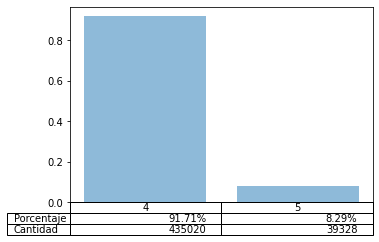

Probabilidad de ganar 0.0474348


In [ ]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, spanish_cool_deck, [7, 7, 5], ploting=True)
print("Probabilidad de ganar {}".format(probability))

## Punto 4

In [ ]:
spanish_hot_deck = [1, 1, 1, 1, 2, 2, 2, 2, 10, 10, 10, 10]
poker_hot_deck = [1, 1, 1, 1, 2, 2, 2, 2, 10, 10, 10, 10]
spanish_cold_deck = [8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10]
poker_cold_deck = [8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10]

In [ ]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, spanish_hot_deck, [7, 7, 5], saving_memory=True, ploting=True)
print("Probabilidad de ganar {}".format(probability))

[7, 7, 5, 10]
Probabilidad de ganar 0.4241882


In [ ]:
probability, win_cards_sum = monte_carlo_blackjack(10000, spanish_cold_deck, [7, 7, 5], saving_memory=True)
print("Probabilidad de ganar {}".format(probability))

[7, 7, 5, 10]
Probabilidad de ganar 0.0


In [ ]:
probability, win_cards_sum = monte_carlo_blackjack(10000, poker_hot_deck, [7, 7, 5], saving_memory=True, ploting=True)
print("Probabilidad de ganar {}".format(probability))

[7, 7, 5, 1, 10]
Probabilidad de ganar 0.4274


In [ ]:
probability, win_cards_sum = monte_carlo_blackjack(10000, poker_cold_deck, [7, 7, 5], saving_memory=True)
print("Probabilidad de ganar {}".format(probability))

[7, 7, 5, 8]
Probabilidad de ganar 0.0


## Punto 5

In [ ]:
balances = []
total_sum_balances = 0 
for i in range (0,10000):
  bet_hot_deck = 1000
  bet_cold_deck = 10
  balance = 0
  for weekend in range (0,600):
    #balance -= bet_hot_deck
    if(r.random()<=0.1):
      balance -= bet_hot_deck
      probability, win_cards_sum = monte_carlo_blackjack(1, spanish_hot_deck, [7,7,5])
      
      if(probability == 1):
        #balance += bet_hot_deck*1.5
        balance += bet_hot_deck*2
    else:
      balance -= bet_cold_deck
      probability, win_cards_sum = monte_carlo_blackjack(1, std_spanish_deck)
      #probability, win_cards_sum = monte_carlo_blackjack(1, spanish_cold_deck, [7,7,5])

      if(probability == 1):
        #balance += bet_cold_deck*1.5
        balance += bet_cold_deck*2
  balances.append(balance)
  total_sum_balances += balance

print('El promedio de los balances obtenidos es: {}'.format(total_sum_balances/len(balances)))
#plt.hist(balances, bins=30)
#plt.show();


El promedio de los balances obtenidos es: -12711.671
